In [1]:
import pandas as pd
import json
import numpy as np

def csv_drive_path_generatoer(url:str):
 '''
 Help in read csv file directly from google drive.
 Make sure the csv format is standard.
 url:str - path to csv file example:
   url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
 return : str
 '''
 path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
 return path

# Y Actual

In [2]:
path = csv_drive_path_generatoer('https://drive.google.com/file/d/1spB4h2qKPEjCqFyDiyGWn9Gi2FwX-Or2/view?usp=sharing')
y_test_actual = pd.read_csv(path,index_col=[0] )
y_test_actual.head()

,Salary,id
2,150000.0,2
3,60000.0,3
7,80000.0,7
9,110000.0,9
11,140000.0,11


# Y pred

In [3]:
group = 5
with open(f'{group}.json') as json_file:
    y_test_pred = json.load(json_file)

# Test

#### ids

In [4]:
if sorted([int(i) for i in list(y_test_pred.keys())]) == sorted(y_test_actual.id.tolist()):
  print("All ids exists and valid")
else:
  print("make sure there is no missing ids and the ids are in the right foramt (for example: 123.0 not valid, 123 valid)")

All ids exists and valid


Salary

In [5]:
import numbers
valid_predictions = len([1 for x in y_test_pred.values() if not isinstance(x, numbers.Number) ]) == 0

if valid_predictions:
  print("valid predictions")
else:
  print("not valid predictions, make sure there is no Nones strings or other not a number preditions values foramt")

valid predictions


# RMSE

In [6]:
actual = []
predicted = []

se = 0
for k,pred in y_test_pred.items():
  # Get actual
  actl = y_test_actual.Salary[y_test_actual.id == int(k)].values[0]

  # Append values
  actual.append(actl)
  predicted.append(pred)

  # calculate sum of squered error
  se += (pred - actl)**2

# Take mean
mse = se/len(y_test_actual)

# Take square root
rmse = mse ** 0.5

print(f"Final rmse is {int(rmse)}")

Final rmse is 12885


# Plot actual vs predicted vs random

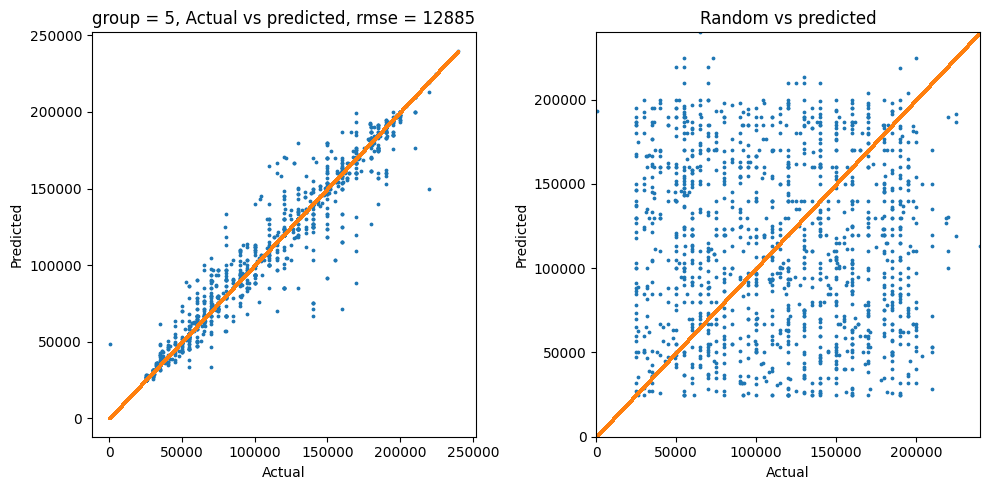

In [7]:

import matplotlib.pyplot as plt
import numpy as np
from random import sample


# Initialise the subplot
figure, axis = plt.subplots(1, 2, figsize=(10,5))

# 45 degrees line
m_v = max(actual + predicted)
r = range(0,int(m_v))


# Actual vs predicted
axis[0].scatter(actual, predicted,s=3)
axis[0].scatter(r, r, s=1)
axis[0].set_title(f"group = {group}, Actual vs predicted, rmse = {int(rmse)}")
axis[0].set_xlabel('Actual')
axis[0].set_ylabel('Predicted')

# Random vs predicted
random = sample(actual,len(actual))
axis[1].scatter(random, predicted,s=3)
axis[1].scatter(r, r, s=1)
axis[1].set_title("Random vs predicted")
axis[1].set_xlabel('Actual')
axis[1].set_ylabel('Predicted')

plt.xlim([0,m_v])
plt.ylim([0,m_v])
plt.tight_layout()
plt.savefig(f'actual_vs_predicted_plot_group_{group}.png')
plt.show()

In [ ]:
# {1: 10111,
#  2: 9421,
#  3: 37316,
#  4: 27566,
#  5: 125799,
#  6: 11059,
#  7: 28440,
#  8: "no results are attached"
#  9: 81846}